<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Clasificación con Python</font></h1>


En este cuaderno trataremos de practicar todos los algoritmos de clasificación aprendidos durante el curso.

Cargaremos un conjunto de datos mediante la librería Pandas, aplicaremos los siguientes algoritmos y encontraremos el mejor para este conjunto en específico con métodos precisos de evaluación.

Carguemos primero las librerías necesarias:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

### Acerca del conjunto de datos


Este conjunto de datos trata sobre el desempeño de diversos equipos de baloncesto. El conjunto **cbb.csv** incluye información sobre el desempeño de 354 equipos a lo largo de cinco temporadas. Contiene los siguientes campos de información:

| Campo      | Descripción                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| ---------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| TEAM       | El equipo escolar de baloncesto de División I                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| CONF       | Conferencia Deportiva en la que participa la escuela (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Número de partidos jugados                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| W          | Número de partidos ganados                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| ADJOE      | Adjusted Offensive Efficiency / Eficiencia Ofensiva (Una estimación de la eficiencia ofensiva (puntos anotados por cada 100 posesiones) que un equipo tendría respecto al promedio defensivo de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ADJDE      | Adjusted Defensive Efficiency / Eficiencia Defensiva (Una estimación de la eficiencia defensiva (puntos permitidos por cada 100 posesiones) que un equipo tendría respecto al promedio ofensivo de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BARTHAG    | Power Rating / Clasificación (La oportunidad de superar el promedio de un equipo de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EFG_O      | Porcentaje de Efectividad de Tiro                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EFG_D      | Porcentaje de Efectividad Permitido                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| TOR        | Porcentaje de Rotación Permitido (Clasificación de Rotación)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| TORD       | Porcentaje de Rotación Ejecutado (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ORB        | Porcentaje de Rebote Ofensivo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| DRB        | Porcentaje de Rebote Defensivo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| FTR        | Tasa de Tiro Libre (Que tan a menudo el equipo realiza tiros libres)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| FTRD       | Tasa de Tiro Libre Permitido                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| 2P_O       | Porcentaje de Tiros de Dos Puntos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| 2P_D       | Porcentaje de Tiros de Dos Puntos Permitidos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| 3P_O       | Porcentaje de Tiros de Tres Puntos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| 3P_D       | Porcentaje de Tiros de Tres Puntos Permitidos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJ_T      | Tempo Ajustado (Estimación del tempo (posesiones por cada 40 minutos) que un equipo tendría respecto aquel equipo que quisiera juagar con el tempo promedio de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| WAB        | Victorias sobre Burbuja (La burbuja se refiere al corte entre lograr el NCAA March Madness Tournament y no)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| POSTSEASON | Ronda donde el equipo fue eliminado o donde finalizó su temporada (R68 = Primeros Cuatro, R64 = Ronda de 64, R32 = Ronda de 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Ultimos Cuatro, 2ND = Subcampeón, Champion = Ganador del NCAA March Madness Tournament de ese año)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| SEED       | Semilla del NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| YEAR       | Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |


### Cargar datos desde el archivo CSV


Cargemo el conjunto de datos \[NB Necesita dar el enlace hacia el archivo csv]


In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

## Añadir Columna

A continuación añadiremos una columna que mostrará "true" si las victorias sobre la burbuja superan las 7 y "false" si no. Nombraremos esta columna Win Index o "windex" para abreviar.


In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Visualización de los Datos y pre procesamiento


Después filtraremos los equipos dentro del conjunto de datos que lograrón un "Sweet Sixteen", "Elite Eight" y "Final Four". Generaremos además un nuevo dataframe que mantendra los valores de la nueva columna.


In [5]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [6]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 equipos alcanzarón a llegar a Sweet Sixteen, 16 a Elite Eight y 8 a Final Four a lo largo de 5 temporadas.


Grafiquemos algunas columnas para entender mejor la información:


In [ ]:
# observación: la instalación de seaborn podría tomar algunos minutos.
!conda install -c anaconda seaborn -y

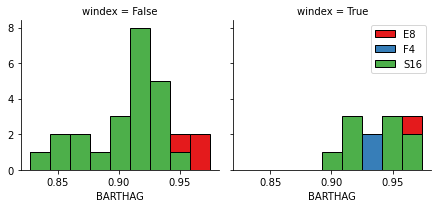

In [7]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

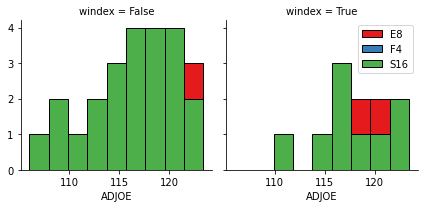

In [8]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre procesamiento: selección/extracción de características


### Veamos como se grafica el valor Adjusted Defense Efficiency ( Eficiencia Defensiva)


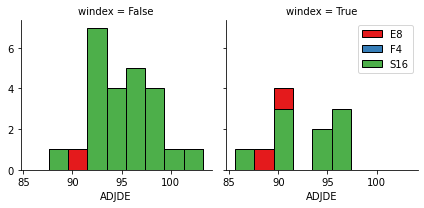

In [9]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Observamos que estos datos no impactan en la habilidad de un equipo de poder alcanzar Final Four.


## Convertir características categóricas en valores numéricos


Veamos la post temporada:


In [10]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

El 13% de los equipos con 6 o menos victorias sobre la burbuja llegaron a Final Four mientra que el 17% con 7 o mas lo hicierón.


Transformemos las victorias sobre la burbuja (winindex) abajo de 7 hasta 0 y arriba de 7 hasta 1:


In [11]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Selección de característica


Definamos los conjuntos de características, X:


In [12]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


¿Cuales son nuestras etiquetas? Rondas donde el equipo fue eliminado o donde finalizó su temporada (R68 = Primeros Cuatro, R64 = Ronda de 64, R32 = Ronda de 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Ultimos Cuatro, 2ND = Subcampeón, Champion = Ganador del NCAA March Madness Tournament de ese año)


In [13]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Datos Normalizados


La estandarización de los datos le da a estos una media de cero y varianza con valor de la unidad (tecnicamente debería hacerse despues de la división entre grupos de prueba y entrenamiento)


In [14]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Entrenamiento y Validación


Dividir el conjunto entre datos de entrenamiento y validación.


In [15]:
# Dividir X entre entrenamiento y prueba para encontrar el mejor valor de k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Clasificación


Ahora es su turno, utilice el conjunto de entrenamiento para construir un modelo preciso. Despues use el conjunto de validación para reportar la precisión del modelo.
Deberá utilizar el siguiente algoritmo:

*   K Nearest Neighbor(KNN)
*   Arbol de Decisión
*   Maquina de Soporte Vectorial (SVM)
*   Regresión Logística


# K Nearest Neighbor(KNN)

<b>Pregunta  1 </b> Construya un modelo KNN donde k sea igual a cinco, encuentre la precisión de los datos de validación (X_val y y_val)


Puede utilizar <code> accuracy_score</cdoe>


In [16]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat_knn = neigh.predict(X_val)

metrics.accuracy_score(y_val, yhat_knn)

0.6666666666666666

<b>Pregunta  2</b> Determine e imprima la precisión para los primeros 15 valores de k en los datos de validación:


In [17]:
Ks = 16
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh_2 = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat_knn_2 = neigh_2.predict(X_val)
    
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat_knn_2)

print(mean_acc)

[0.33333333 0.33333333 0.5        0.58333333 0.66666667 0.58333333
 0.58333333 0.66666667 0.58333333 0.58333333 0.58333333 0.5
 0.58333333 0.58333333 0.58333333]


# Arbol de Decisión


Las siguientes líneas de código se ajustan en <code>DecisionTreeClassifier</code>:


In [18]:
from sklearn.tree import DecisionTreeClassifier

<b>Pregunta  3</b> Determine el valor mínimo para el parámetro <code>max_depth</code> que mejora los resultados


In [19]:
print(X_val.shape)

(12, 21)


In [20]:
depth = 22
accur = np.zeros((depth-1))
for n in range(1,depth):
    pos_tree = DecisionTreeClassifier(criterion='entropy', max_depth=n).fit(X_train,y_train)
    pred_tree = pos_tree.predict(X_val)
    
    accur[n-1] = metrics.accuracy_score(y_val, pred_tree)

print(accur)

[0.66666667 0.66666667 0.5        0.33333333 0.5        0.5
 0.5        0.41666667 0.41666667 0.5        0.41666667 0.41666667
 0.5        0.5        0.5        0.5        0.5        0.41666667
 0.5        0.5        0.5       ]


In [21]:
print( "El valor mínimo de max_depth que mejora los resultados es: ", accur.argmax()+1, "con una certeza de: ", accur.max())

El valor mínimo de max_depth que mejora los resultados es:  1 con una certeza de:  0.6666666666666666


# Maquina de Soporte Vectorial (SVM)


<b>Pregunta  4</b> Entrene el modelo Maquina de Soporte Vectorial y determine la precisión de los datos de validación de cada nucleo. Encuentre el nucleo ((linear, poly, rbf, sigmoid) que otorge la mejor puntuación para los datos y entrene un SVM con el.


In [22]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score

In [23]:
function = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_svm = np.zeros(4)

for i,n in enumerate(function):
    clf = svm.SVC(kernel=n)
    clf.fit(X_train, y_train)
    pred_svm = clf.predict(X_val)
    accuracy_svm[i] = metrics.accuracy_score(y_val, pred_svm)
    
print(accuracy_svm)


[0.25       0.66666667 0.58333333 0.58333333]


El mejor modelo es 'poly' con una certeza de 0.667

In [24]:
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
pred_svm_poly = clf_poly.predict(X_val)
print(y_val)
print(pred_svm_poly)

['F4' 'S16' 'S16' 'S16' 'S16' 'E8' 'S16' 'F4' 'S16' 'E8' 'S16' 'S16']
['S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16' 'S16']


# Regresión Logística


<b>Pregunta 5</b> Entrene un modelo de regresión logística y determine la precisión de los datos de validación (set C=0.01)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [26]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat_log = LR.predict(X_val)
yhat_log_prob = LR.predict_proba(X_val)

acc_log = metrics.accuracy_score(y_val, yhat_log)

print(acc_log)

0.5833333333333334


# Evaluación del Modelo con el Conjunto de Prueba


In [ ]:
# para f1_score establezca el promedio del parámetro en 'micro'
from sklearn.metrics import log_loss

In [27]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Pregunta  5</b> Calcule la puntuación de F1 y de la medida de Jaccard para cada modelo de arriba. Utilice el hiper parámetro de mejor desempeño para los datos de validación. **para f1\_score establezca el promedio del parámetro en 'micro'.**


### Cargar el conjunto de prueba para la evaluación


In [28]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [29]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [30]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

KNN


In [31]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
yhat_knn = neigh.predict(test_X)

accuracy_knn = metrics.accuracy_score(test_y, yhat_knn)
f1_knn = f1_score(test_y, yhat_knn, average='micro')
jcc_knn = jaccard_index(yhat_knn, test_y)

Arbol de Decisión


In [32]:
pos_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X_train,y_train)
pred_tree = pos_tree.predict(test_X)

accuracy_tree = metrics.accuracy_score(test_y, pred_tree)    
f1_tree = f1_score(test_y, pred_tree, average='micro')
jcc_tree = jaccard_index(pred_tree, test_y)

SVM


In [33]:
clf_poly = svm.SVC(kernel='poly').fit(X_train, y_train)
pred_svm_poly = clf_poly.predict(test_X)

accuracy_svm = metrics.accuracy_score(test_y, pred_svm_poly)
f1_svm = f1_score(test_y, pred_svm_poly, average='micro')
jcc_svm = jaccard_index(pred_svm_poly, test_y)

Regresión Logistica


In [34]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
yhat_log = LR.predict(test_X)
yhat_log_prob = LR.predict_proba(test_X)

accuracy_log = metrics.accuracy_score(test_y, yhat_log)
f1_log = f1_score(test_y, yhat_log, average='micro')
jcc_log = jaccard_index(yhat_log, test_y)
Log_Loss = log_loss(test_y, yhat_log_prob)

In [35]:
data = {'Algoritmo':['KNN', 'Arbol de Decisión', 'SVM', 'Regresión Logística'],
        'Precisión':[accuracy_knn, accuracy_tree, accuracy_svm, accuracy_log],
        'Jaccard':[jcc_knn, jcc_tree, jcc_svm, jcc_log],'F1':[f1_knn, f1_tree, f1_svm, f1_log],
        'LogLoss':['NA', 'NA', 'NA', Log_Loss]}
Report = pd.DataFrame(data)
Report

,Algoritmo,Precisión,Jaccard,F1,LogLoss
0,KNN,0.628571,0.458333,0.628571,NA
1,Arbol de Decisión,0.642857,0.473684,0.642857,NA
2,SVM,0.685714,0.521739,0.685714,NA
3,Regresión Logística,0.685714,0.521739,0.685714,1.037187


# Reporte

Deberá reportar la precisión del modelo utilizando distintas métricas de evaluación:


| Algoritmo           | Precisión | Jaccard  | F1       | LogLoss |
| ------------------- | --------- | -------- | -------- | ------- |
| KNN                 | 0.628571  | 0.458333 | 0.628571 | NA      |
| Arbol de Decisión   | 0.642857  | 0.473684 | 0.642857 | NA      |
| SVM                 | 0.685714  | 0.521739 | 0.685714 | NA      |
| Regresión Logística | 0.685714  | 0.521739 | 0.685714 | 1.03719 |


Algo a tener en cuenta cuando se crean modelos para predecir los resultados en torneos de baloncesto o deportes en general es su dificultad debido a la gran cantidad de factores que influyen en el juego. Incluso en deportes de apuestas, una precisión del 55% o mas se considera buena debido a que indica ganancias.


<h2>¿Quiere aprender mas?</h2>

IBM SPSS Modeler es una plataforma para el análisis que contiene muchos algoritmos de aprendizaje automático (machine learning). Ha sido diseñado con el fin de ofrecer predicciones inteligentes a las decisiones hechas por personas, grupos, sistemas - con la compañia como un todo. Una prueba gratuita esta disponible a traves de este curso desde aqui: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">SPSS Modeler</a>

Además, puede utilizar Watson Studio para ejecutar estos cuardernos mas rápido y con conjuntos de datos mas grandes. Watson Studio es la solución líder de IBM en la nube para científicos de datos, contruido por científicos de datos. Con los cuadernos de Jupyter, RStudio, Apache Spark y librerías pre instaladas en la nube, Watson Studio permite a los científicos de datos colaborar en sus proyectos sin necesidad de instalar nada. Unase a la gran comunidad de usuarios de Watson Studio hoy con un cuenta gratuita en <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">Watson Studio</a>

<h3>Gracias por terminar esta lección</h3>

<h4>Autores: <a href="https://www.linkedin.com/in/azim-hirjani-691a07179/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">Azim Hirjani</a> y <a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">Joseph Santarcangelo</a></h4>

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01" target="_blank">Joseph Santarcangelo</a> es un Cientifico de Datos en IBM que posee un Doctorado en Ingeniería Electrica. Su investigación se enfoca en el uso de Aprendizaje Automático, Procesamiento de Señales y Visión Artificial para determinar el impacto de los videos en la cognición. Joseph ha trabajado para IBM desde el término de su doctorado.
</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2021-01-01">MIT License</a>.</p>
